# Pandas Tutorial

In [2]:
# Importing pandas using conventional method
import pandas as pd

### 1. How to read a table using Pandas

In [3]:
orders = pd.read_table('http://bit.ly/chiporders')

#### Difference between read_table and read_csv methods of pandas is in the default params. The seperator is '\t' (tab) for read_table but ',' for read_csv.

In [4]:
# To get the first 5 rows of the dataset
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
# You can specify the number of rows that you want to see by specifying like this
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
# To get the last rows of the dataset
orders.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 2. How to specify separator in Pandas read_table() method

In [8]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

Using this way for reading, you can specify the column names you want to read and the read method will only read those columns out of the dataset.

In [9]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
# Selecting a particular column or a series from a dataframe
# There are two ways - 
# 1. Dot operator - eg. users.occupation 
# 2. Using Bracket Notation - eg. users['occupation']
users.occupation.head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [12]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

Bracket notation will always work, whereas dot notation has limitations:
- Dot notation doesn't work if there are spaces in the Series name
- Dot notation doesn't work if the Series has the same name as a DataFrame method or attribute (like 'head' or 'shape')
- Dot notation can't be used to define the name of a new Series 

##### In Pandas, Methods like read_table(), read_csv() end with parantheses whereas attributes do not for eg. .shape, .dtypes

### 3. How to check the datatypes of the columns in the Dataframe

In [15]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### 4. How to check for the size of the Dataframe 

In [16]:
users.shape

(943, 5)

### 5. How to know the details of the Dataframe 

In [17]:
# It provides the statistics summary
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [18]:
# To check for only object type colums 
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


### 6. How to rename the column names in the Dataframe

In [20]:
# Firstly how to see all the column names in the dataframe
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [26]:
# Columns of a Dataframe can be renamed using the following methods:
# 1. Dataframe.rename(columns= {'X': 'x', 'Y':'y'}, inplace=True)
users.rename(columns={'user_id': 'ID', 'age': 'Age'}, inplace=True)
users.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Zip_Code'], dtype='object')

#### inplace=True - helps to perform the operation on the same object whereas inplace=False returns the copy of the object after applying the operation to it.

In [25]:
# 2. Specify a list of names of the columns and then set the Dataframe.columns = column_name_list 
users_cols = ['ID', 'Age', 'Gender', 'Occupation', 'Zip_Code']
users.columns = users_cols
users.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Zip_Code'], dtype='object')

In [29]:
# 3. Replace the columns right when you are reading the data
users_cols = ['ID', 'Age', 'Gender', 'Occupation', 'Zip_Code']
users = pd.read_table('http://bit.ly/movieusers', header=None, names=users_cols)
users.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Zip_Code'], dtype='object')

In [31]:
# Column names can be read as string and all string operations can then be applied easily
users.columns = users.columns.str.replace('_', ' ')
users.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Zip Code'], dtype='object')

### 7. How to delete/drop a column from a Dataframe

In [45]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [38]:
users.drop('zip_code', axis=1, inplace=True)
users.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


axis = 0 
- used for performing opertaions on the rows
- operation should move down - row axis
- 'index' -> alias for axis = 0

axis = 1
- used for perfoming operations on the columns
- operation should move across - column axis
- 'columns' -> alias for axis = 1

In [44]:
# We can drop multiple columns altogether
users.drop(['zip_code', 'user_id'], axis=1, inplace=True)
users.head()

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other


In [46]:
# To remove rows 
users.drop([0, 1], axis=0, inplace=True)
users.head()

,user_id,age,gender,occupation,zip_code
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


### 8. Sorting Pandas Dataframe or Series

In [47]:
# Read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [48]:
# Sort the 'title' Series in ascending order (returns a Series)
# Note: this is temporary sorting
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [49]:
# Sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [50]:
# Sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [51]:
# Sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


In [52]:
# Sort the DataFrame with multiple columns
# This way, sort function is applied to the first column, here it would be content_rating 
# and then it is applied to the next one and so on, here it would then be applied to duration
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


### How to filter out rows with a condition applied to columns in Dataframe

In [53]:
# If you are to find out movies that have duration of 200 or more then one liner solution is:
movies[movies['duration'] >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [54]:
# If I have to find values of only one column when a specific condition is true
movies[movies['duration'] >= 200]['genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [56]:
# If you are to apply two conditions together then "and" and "or" operator can be used. 
# "and" operator says that both the conditions should be met and then only it gives out the result 
# "or" operator says that one of the conditions should be true and it would show the result
# For implementing logic operations in pandas, "and" -> "&", "or" -> "|" and paranthese should be used.
movies[(movies['duration'] >= 200) & (movies['genre'] == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### 9. How to read only a subset of rows 

In [61]:
movies = pd.read_csv('http://bit.ly/imdbratings', nrows=3)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


### 10. How to iterate over a Series

In [62]:
for title in movies['title']:
    print(title)

The Shawshank Redemption
The Godfather
The Godfather: Part II


### 11. How to iterate over a Dataframe

In [64]:
for index, row in movies.iterrows():
    print(index, row.title, '->', row.genre)

0 The Shawshank Redemption -> Crime
1 The Godfather -> Crime
2 The Godfather: Part II -> Crime


### 12. How to drop all non-numeric columns from a Dataframe

In [66]:
# Firstly let's check for the data type of all columns
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [67]:
# Only include numeric columns in the DataFrame
import numpy as np
movies.select_dtypes(include=[np.number]).dtypes

star_rating    float64
duration         int64
dtype: object

### 13. Finding mean of column values and row values

In [71]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [72]:
# Remember axis=0 or axis='index' -> operations would be implemented along the column and 
# axis=1 or axis='columns' -> operations would be implemented along the rows
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [73]:
# drinks.mean() is equivalent to the following 
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [76]:
# This is again for column mean
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [75]:
# To find mean of rows
# This would calculate mean for all the rows in the dataset
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [78]:
drinks.mean(axis='columns').head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

### 14. How to change data type of a column in Dataframe

In [81]:
# Firstly let's check the datatype of all the columns in drinks dataset
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [83]:
# Changing beer_servings data type from int to float
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [84]:
# The other way of changing the datatype is to change it while reading the dataset
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

### 15. Pandas Groupby

In [85]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [86]:
# Calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [87]:
# Calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [88]:
# Calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [89]:
# Applying aggregation functions lke max, min, mean along with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [90]:
# Applying multiple aggregation functions simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [91]:
# If we don't specify a column then the groupby and aggregation function is applied to all the columns
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [102]:
# Importing matplotlib to plot charts
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

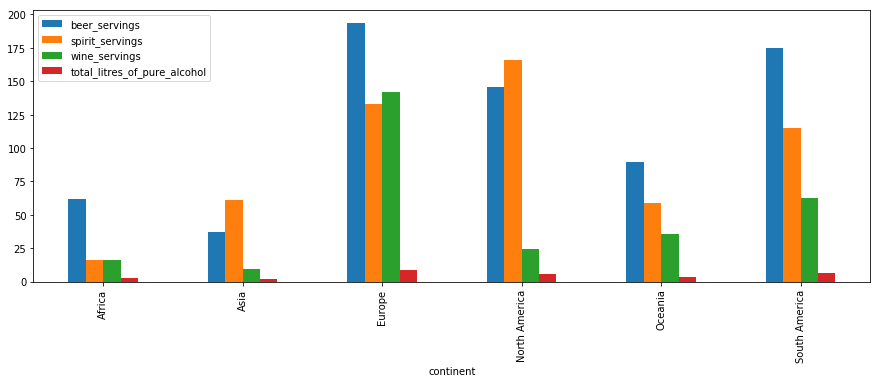

In [104]:
drinks.groupby('continent').mean().plot(kind='bar')

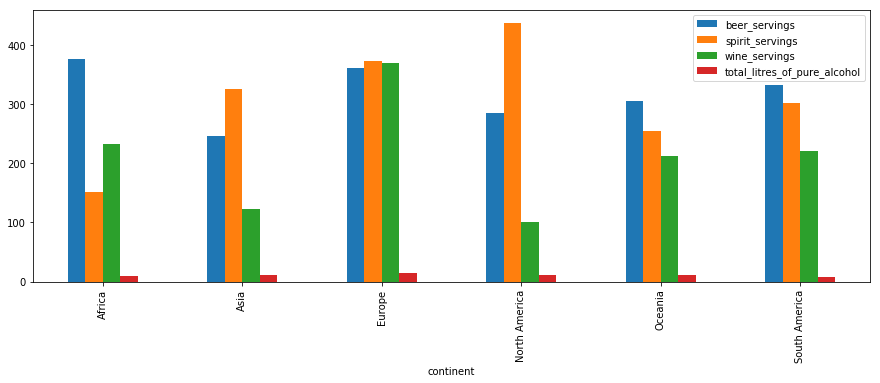

In [105]:
drinks.groupby('continent').max().plot(kind='bar')

### 16. Exploring Series - Non- Numeric 

In [107]:
# Checking for data types of columns
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [109]:
# Counting the non-null values, unique values, and frequency of the most common value
drinks['continent'].describe()

count        193
unique         6
top       Africa
freq          53
Name: continent, dtype: object

In [111]:
# Counting how many times each value in the Series occurs
drinks['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [112]:
# Displaying percentages instead of raw counts
drinks['continent'].value_counts(normalize=True)

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [114]:
# To find all unique values in a series
drinks['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [115]:
# unique() -> provides list of all the unique values in a series
# nunique() -> provides with the number of unique values in the series

In [116]:
drinks['continent'].nunique()

6

In [118]:
# Computing a cross-tabulation of two Series
# By default computes a frequency table of the factors unless an array of values and an aggregation function 
# are passed
pd.crosstab(drinks['continent'], drinks['beer_servings'])

beer_servings,0,1,2,3,5,6,8,9,12,13,...,295,297,306,313,333,343,346,347,361,376
continent,,,,,,,,,,,,,,,,,,,,,
Africa,3,1,0,1,1,1,3,2,1,0,...,0,0,0,0,0,0,0,1,0,1
Asia,8,2,1,0,4,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
Europe,2,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,2,1,0,1,0
North America,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oceania,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
South America,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 17. Exploring Series - Numeric

In [119]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [120]:
drinks['beer_servings'].mean()

106.16062176165804

In [121]:
drinks['beer_servings'].value_counts().head()

0     15
5      5
6      4
31     4
25     4
Name: beer_servings, dtype: int64

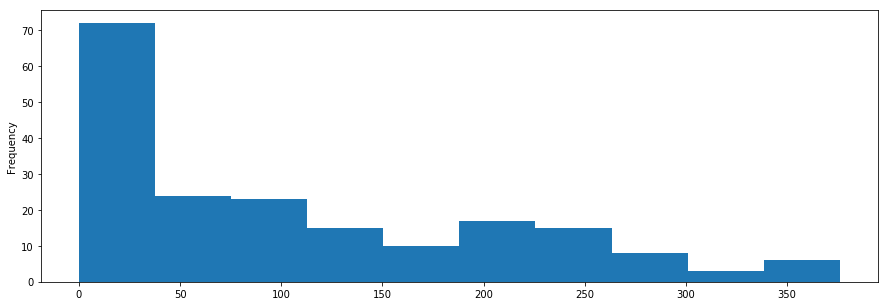

In [122]:
drinks['beer_servings'].plot(kind='hist')

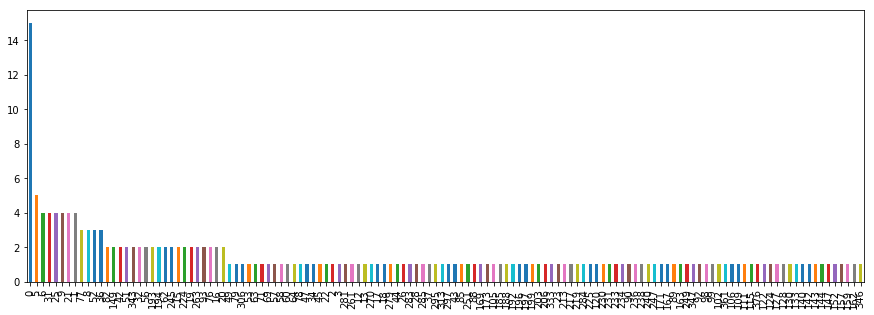

In [123]:
drinks['beer_servings'].value_counts().plot(kind='bar')

### 18. Handling missing values in Pandas

In [186]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


- "Nan" value stands for "Not a number" and indicates a missing value
- read_csv() method recognizes the missing values automatically and replaces them with "Nan"

In [125]:
# How to check if Dataframe contains "Nan" values
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [126]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [127]:
# Counting the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

- The sum method for a DataFrame operates on axis=0 by default (and thus produces column sums).
- In order to add boolean values, pandas converts True to 1 and False to 0.

In [128]:
# Filtering out rows that contains "Nan" values
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


- It completely depends upon the dataset and the type of analysis to fill the "Nan" values

In [130]:
ufo.shape

(18241, 5)

In [129]:
# First way of filling "Nan" values is dropping all the rows that contains them
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [131]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [132]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [133]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [134]:
# Explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [135]:
# fill in missing values with 0
ufo['Shape Reported'].fillna(value=0, inplace=True)

In [136]:
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
0           2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [187]:
# There are various ways to drop 'Nan' values from a dataframe 
# inplace=True -> makes changes in the existing dataframe
# inplace=False -> does not make any change in the dataframe and makes a copy of the dataframe and 
# then performs the operation
# Droping a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

(2486, 5)

In [188]:
# Use an assignment statement instead of the 'inplace' parameter
ufo = ufo.set_index('Time')
ufo.tail()

,City,Colors Reported,Shape Reported,State
Time,,,,
12/31/2000 23:00,Grant Park,NaN,TRIANGLE,IL
12/31/2000 23:00,Spirit Lake,NaN,DISK,IA
12/31/2000 23:45,Eagle River,NaN,NaN,WI
12/31/2000 23:45,Eagle River,RED,LIGHT,WI
12/31/2000 23:59,Ybor,NaN,OVAL,FL


In [189]:
# Fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail()

,City,Colors Reported,Shape Reported,State
Time,,,,
12/31/2000 23:00,Grant Park,RED,TRIANGLE,IL
12/31/2000 23:00,Spirit Lake,RED,DISK,IA
12/31/2000 23:45,Eagle River,RED,LIGHT,WI
12/31/2000 23:45,Eagle River,RED,LIGHT,WI
12/31/2000 23:59,Ybor,NaN,OVAL,FL


In [190]:
# Comparing with "forward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='ffill').tail()

,City,Colors Reported,Shape Reported,State
Time,,,,
12/31/2000 23:00,Grant Park,RED,TRIANGLE,IL
12/31/2000 23:00,Spirit Lake,RED,DISK,IA
12/31/2000 23:45,Eagle River,RED,DISK,WI
12/31/2000 23:45,Eagle River,RED,LIGHT,WI
12/31/2000 23:59,Ybor,RED,OVAL,FL


### 19. Pandas Index

In [138]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [139]:
# Every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [140]:
# Column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [142]:
# Neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [143]:
# Index and Columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


What is the index used for?
- identification
- selection
- alignment (covered in the next video)

In [144]:
# Identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [145]:
# Selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

In [146]:
# Set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [147]:
# 'country' is now the index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [148]:
# 'country' is no longer a column
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [149]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [150]:
# Country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [151]:
# Index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [152]:
# Restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [153]:
drinks.describe()
# output is a dataframe

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [154]:
# Interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

20.0

In [155]:
# Elements in a Series can be selected by index (using bracket notation)
drinks.continent.value_counts()['Africa']

53

In [156]:
# Series can be sorted by its values
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [167]:
# Series can also be sorted by its index
drinks['continent'].value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [168]:
# Creating a Series containing the population of two countries
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

### 20. Selecting rows and columns in Dataframe

In [169]:
# Reading a dataset of UFO reports
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


The loc method is used to select rows and columns by label. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [170]:
# Selecting all columns of 0th row
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [171]:
# Selecting all columns of rows 0 and 1 and 2
ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [172]:
# Better way to perform above code block is
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [173]:
# Implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [174]:
# Selecting rows 0 to 2 (inclusive) and only column 'City'
ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [175]:
# Selecting rows 0 to 2 (inclusive) and columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [176]:
# The other way out is the following code but it using loc is recommended
ufo[['City', 'State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [177]:
# Selecting rows 0 to 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [178]:
# The other way out 
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [179]:
# Finding rows in which City name is "Oakland" and projecting State column
ufo.loc[ufo['City'] == 'Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [180]:
# The other way out
ufo[ufo['City'] == 'Oakland']['State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

The iloc method is used to select rows and columns by integer position. You can pass it with:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [181]:
# Filtering out rows with positions 0 and 1 and columns with positions 0 and 3
ufo.iloc[[0,1], [0,3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [182]:
# Filtering out rows using : operator
ufo.iloc[0:2, 0:4]
# Note: this is exclusive of last index

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [183]:
# For all columns and selected positions of rows
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


The ix method is used to select rows and columns by label or integer position, and should only be used when you need to mix label-based and integer-based selection in the same call.
It is like a combination of both loc and iloc

In [184]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [185]:
# Reading out row with label 'Albania' and column position 0
drinks.ix['Albania', 0]

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


89

Rules for using numbers with ix:

- If the index is strings, numbers are treated as integer positions, and thus slices are exclusive on the right.
- If the index is integers, numbers are treated as labels, and thus slices are inclusive.

### 21. Making Pandas Dataframe smaller and faster

In [191]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [192]:
# Exact memory usage is unknown because object columns are references elsewhere
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [193]:
# Forcing Pandas to calculate the memory usage
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [194]:
# Calculating memory usage for each series in bytes
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [195]:
# Using the 'category' datatype to save 'continent' column values as strings
drinks['continent'] = drinks['continent'].astype('category')

In [196]:
drinks['continent'].head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [197]:
# You can see that now continent column values are encoded
# 0 -> 'Asia'
# 1 -> 'Europe'
# 2-> 'Africa'

In [198]:
drinks['continent'].cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [199]:
# Let's see what impact this has made on memory usage
drinks.memory_usage(deep='True')

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [200]:
# Repeating the process for the 'country' Series
drinks['country'] = drinks.country.astype('category')
drinks.memory_usage(deep=True)

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [201]:
# Memory usage increased because we created 193 categories
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

The category data type should only be used with a string Series that has a small number of possible values.

### 22. Pandas with Scikit-Learn

In [ ]:
# will continue with scikit learn
# handling dummy variables with pandas
# working with dates and times using pandas
# removing duplicate rows 
# exploring display options
# creating pandas dataframe 